# Hola mundo Cuántico!

In [ ]:
pip install qiskit

In [ ]:
pip install qiskit-ibm-runtime

In [ ]:
pip install qiskit[visualization]

In [ ]:
pip install qiskit-aer

In [98]:
# Importing standard Qiskit libraries
#from qiskit import *
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.visualization import *
from qiskit_aer import AerSimulator
import warnings
warnings.filterwarnings('ignore')

In [99]:
# Crear un backend para ejecución en un simulador local
sim_backend = AerSimulator()

# Basic NOT circuit

Objetivo: pasar un cúbit del estado inicial |0⟩ al estado |1⟩

Nota: Los cúbits en los sistemas IBM siempre se restablecen al estado |0⟩ al inicio del circuito.

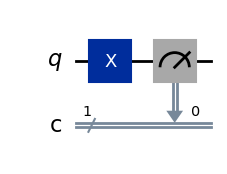

In [100]:
# Create a new circuit with 1 qubit (first argument) and 1 classical
# bits (second argument)
qc = QuantumCircuit(1,1)

# Add X gate to qubit
qc.x(0)

# Measure qubit to classic bit
qc.measure(0,0)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw(output='mpl')

In [101]:
# Run basic circuit and measure
job = sim_backend.run(qc, shots=2048)
result = job.result()
counts = result.get_counts()

counts

{'1': 2048}

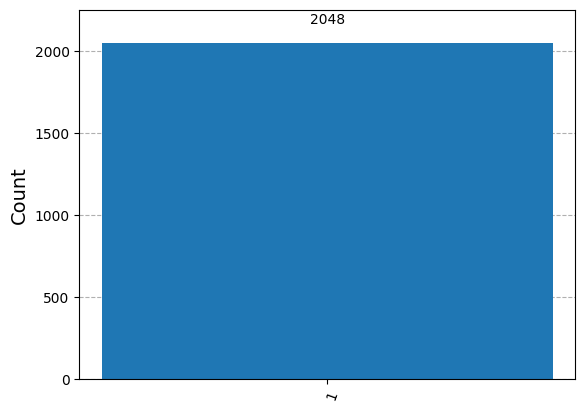

In [103]:
# Plot histogram of results
plot_histogram(counts)

# Superposition

Objetivo: colocar un qubit en una superposición par de |0⟩ y |1⟩

Recuerda: Superposición es una característica cuántica que permite que dos estados (ej. |1> o |0>) puedan ser obtenidos al mismo tiempo. La Compuerta Hadamard (H) nos permite super poner los dos estados posibles de un qubit.

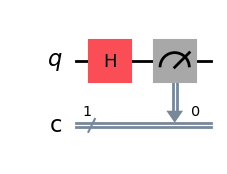

In [104]:
# Create superposition circuit by using the Hadamard gate
sp_circ = QuantumCircuit(1,1)
sp_circ.h(0)
sp_circ.measure(0,0)
sp_circ.draw("mpl")

In [105]:
# Run simulation and plot results
job = sim_backend.run(sp_circ)
sp_counts = job.result().get_counts()
sp_counts

{'0': 514, '1': 510}

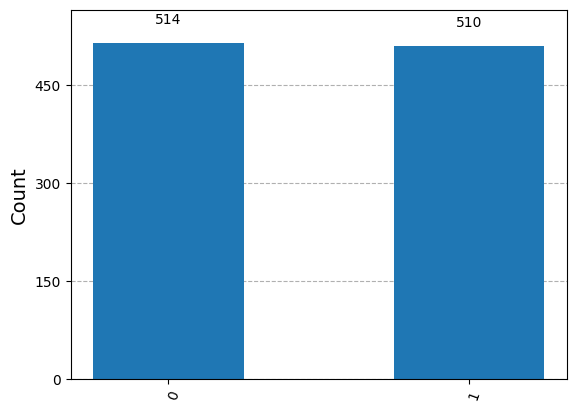

In [106]:
# Plot
plot_histogram(sp_counts)

### Visualización del enfoque estadístico de los experimentos

Ejecuta el mismo experimento pero con un shot. Ejecuta el circuito varias veces manualmente. Observa el resultado.

In [116]:
# Ejecuta este varias veces
job = sim_backend.run(sp_circ, shots=1)
sp_counts = job.result().get_counts()
sp_counts

{'1': 1}

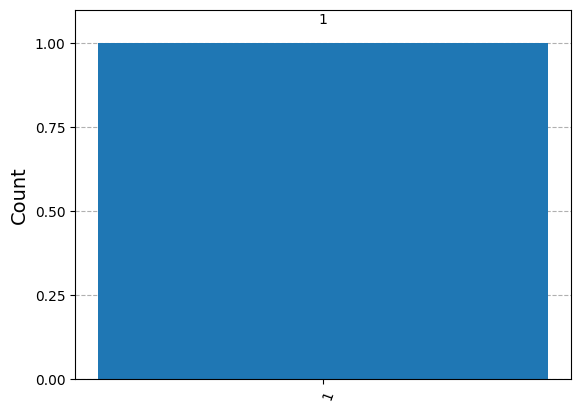

In [117]:
# Plot
plot_histogram(sp_counts)

### Multiple qubits in superposition

En este ejercicio mediremos varios qubits en un estado superpuesto usando compuertas Hadamard.

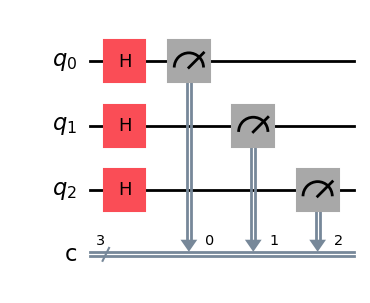

In [118]:
# Create superposition circuit
sp_circ2 = QuantumCircuit(3,3)
sp_circ2.h([0,1,2])
sp_circ2.measure([0,1,2],[0,1,2])
sp_circ2.draw("mpl")

In [119]:
# Run simulation and plot results
# Try increasing the number of shots to see how that affects the result
job = sim_backend.run(sp_circ2, shots=80)
sp_counts = job.result().get_counts()
sp_counts

{'110': 9,
 '101': 7,
 '000': 10,
 '010': 15,
 '100': 11,
 '001': 9,
 '011': 14,
 '111': 5}

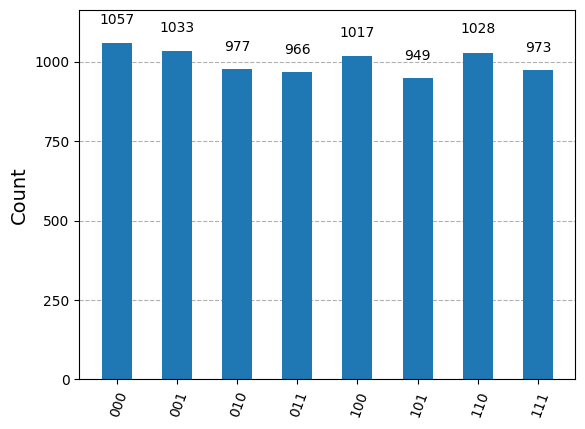

In [120]:
# Run simulation and plot results
# Try increasing the number of shots to see how that affects the result
job = sim_backend.run(sp_circ2, shots=8000)
sp_counts = job.result().get_counts()
plot_histogram(sp_counts)

# Bell state (entrelazamiento)
- Bell state para el caso de dos qubits (entrelazados), cuando medimos uno de ellos y conocemos su estado, podemos inferir el estado del otro qubit.
- En otras palabras, es un estado donde no importa dónde se ubique un qubit, el otro "lo seguirá" con un estado predecible.
- Este tipo de estados ayuda a describir otros estados de un sistema cuántico más complejo.

Objetivo: Crear el estado entrelazado $\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$


Nota: Recuerda que el qubit de control, es aquel donde ubicamos el circulo de menor tamaño.

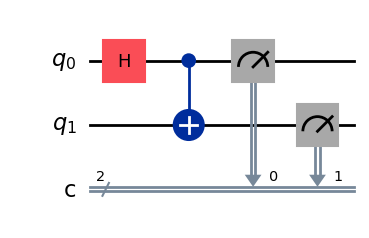

In [121]:
# Create Bell state circuit
bell_circ = QuantumCircuit(2,2)
bell_circ.h(0)
bell_circ.cx(0, 1)
bell_circ.measure([0,1], [0,1])
bell_circ.draw("mpl")

In [122]:
job = sim_backend.run(bell_circ)
bell_counts = job.result().get_counts()
bell_counts

{'11': 507, '00': 517}

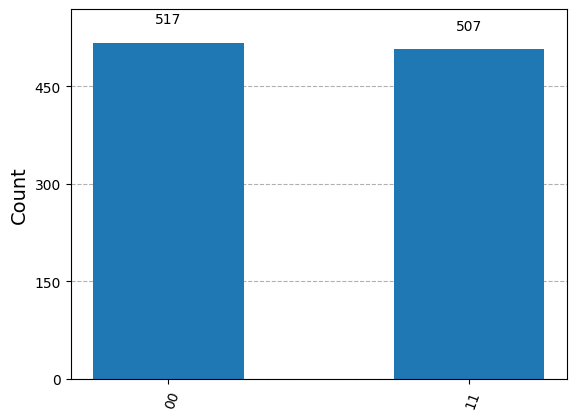

In [123]:
plot_histogram(bell_counts)

# Ahora usando una computadora cuántica real

In [124]:
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="PEGAR API TOKEN AQUÍ", set_as_default=True, overwrite=True)

instance = 'ibm-q-asu/main/tec-german'

# Load saved credentials
service = QiskitRuntimeService(instance=instance)

In [ ]:
service.instances()

['ibm-q-asu/main/tec-german',
 'ibm-q-asu/internal/reservations',
 'ibm-q/open/main']

In [ ]:
service.backends()

[<IBMBackend('ibm_torino')>,
 <IBMBackend('ibm_nazca')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_brussels')>,
 <IBMBackend('ibm_strasbourg')>,
 <IBMBackend('ibm_fez')>,
 <IBMBackend('ibm_brisbane')>]

## Ejecutar directamente en los procesadores cuánticos de IBM

In [125]:
#seleccionar manualmente un sistema
backend = service.backend('ibm_nazca')

In [ ]:
# Encontrar el sistema menos ocupado que tenga al menos 2 qubits, que no sea simulador y que esté operando...

def get_least_busy_backend():
    # Load your IBM Quantum account via Qiskit Runtime Service
    service = QiskitRuntimeService()

    # Get all backends that are operational and not simulators
    backends = service.backends(filters=lambda b: b.configuration().n_qubits >= 2
                                  and not b.configuration().simulator
                                  and b.status().operational)

    # Find the least busy backend by manually checking the job queue length
    backend = min(backends, key=lambda b: b.status().pending_jobs)

    print(f"Least busy backend is: {backend.name}")
    return backend

# Get the least busy backend
backend = get_least_busy_backend()

Least busy backend is: ibm_nazca


In [ ]:
# Run the circuit... considera que la ejecucion de un circuito puede tomar tiempo

job_ibmq = backend.run(bell_circ, shots=1024)

In [ ]:
# Consulta el estado del trabajo
job_ibmq.status()

<JobStatus.ERROR: 'job incurred error'>

In [ ]:
# Ver resultados... indicará ERROR porque es necesario hacer transpile del circuito

result = job_ibmq.result()

RuntimeJobFailureError: 'Unable to retrieve job result. Error code 1517; Circuit 0: The instruction h on qubits (0,) is not supported by the target system. -- \\n        Transpile your circuits for the target before submitting a primitive query.\\n        Refer to\\n        `Primitives examples <https://docs.quantum.ibm.com/guides/primitives-examples>`_\\n        for code examples.\\n         -- https://ibm.biz/error_codes#1517'

## Transpile

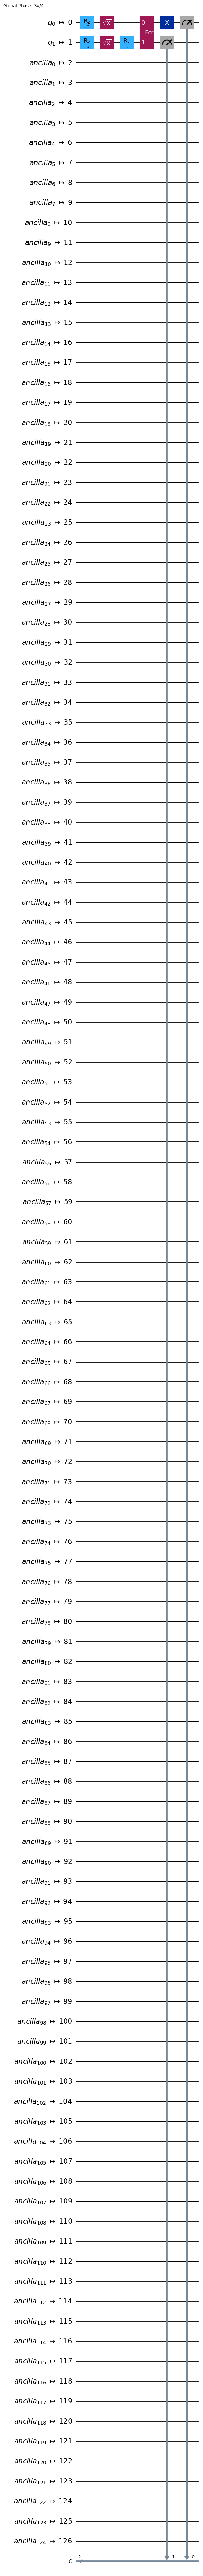

In [ ]:
# Convierte un circuito cuántico de alto nivel en uno optimizado y
# adecuado para ejecutarse en un backend específico (ya sea un simulador o una computadora cuántica real).
# Esto es necesario porque cada backend tiene restricciones particulares de hardware, como la conectividad entre los qubits y los tipos de puertas cuánticas disponibles.

bell_circ_tp = transpile(bell_circ, backend)
bell_circ_tp.draw("mpl")

In [ ]:
from qiskit.providers.jobstatus import JobStatus

# Corre el circuito de nuevo pero ya transpilado
job_ibmq = backend.run(bell_circ_tp, shots=1024)

try:
    job_result = job_ibmq.result()  # It will block until the job finishes.
    print("The job finished with result {}".format(job_result))
except JobError as ex:
    print("Something wrong happened!: {}".format(ex))

The job finished with result Result(backend_name='ibm_nazca', backend_version='0.0.0', qobj_id='Unknown', job_id='Unknown', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 23, '0x0': 480, '0x2': 22, '0x3': 499}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14], ['q', 15], ['q', 16], ['q', 17], ['q', 18], ['q', 19], ['q', 20], ['q', 21], ['q', 22], ['q', 23], ['q', 24], ['q', 25], ['q', 26], ['q', 27], ['q', 28], ['q', 29], ['q', 30], ['q', 31], ['q', 32], ['q', 33], ['q', 34], ['q', 35], ['q', 36], ['q', 37], ['q', 38], ['q', 39], ['q', 40], ['q', 41], ['q', 42], ['q', 43], ['q', 44], ['q', 45], ['q', 46], ['q', 47], ['q', 48], ['q', 49], ['q', 50], ['q', 51], ['q', 52], ['q', 53], ['q', 54], ['q', 55], ['q', 56], ['q', 57], ['q', 58], ['q', 59], ['q', 60], ['q', 61], 

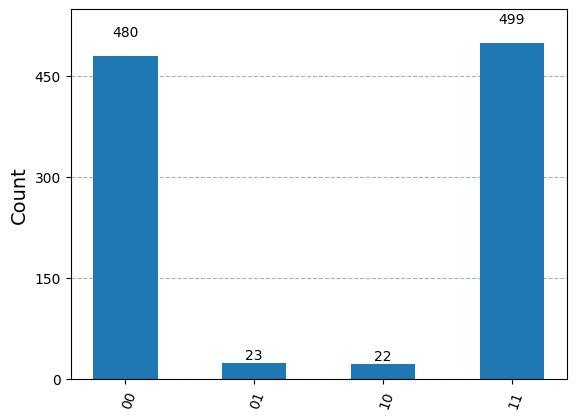

In [ ]:
# Plot histogram of results. Note the noise in the system
# Results in states that should not appear in the measurements.
counts = job_result.get_counts()
plot_histogram(counts)